<a href="https://colab.research.google.com/github/2017Hk/Project4_distracteddrivermultiactionclassification/blob/main/Project4_Distracted_driverMultiAction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import os
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)
from tensorflow.keras import utils
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2.12.0


In [ ]:
!wget -nc -q -O dataset.zip https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0
!unzip -n -q -d dataset dataset.zip
!unzip -n -q -d /content/dataset/image /content/dataset/imgs.zip

In [ ]:
# defining the test directory
test_directory = '/content/dataset/image/test'
# defining the path and classes.
directory = '/content/dataset/image/train'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
# defining a shape to be used for our models.
img_size = 240

In [ ]:
# This line of code are comment this is use to check the number of the test and train data
# for i in classes:
#     path = os.path.join(directory,i)
#     print(len(os.listdir(path)))
# print(len(os.listdir(test_directory)))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129
79726


/content/dataset/image/train/c0
/content/dataset/image/train/c0/img_90747.jpg


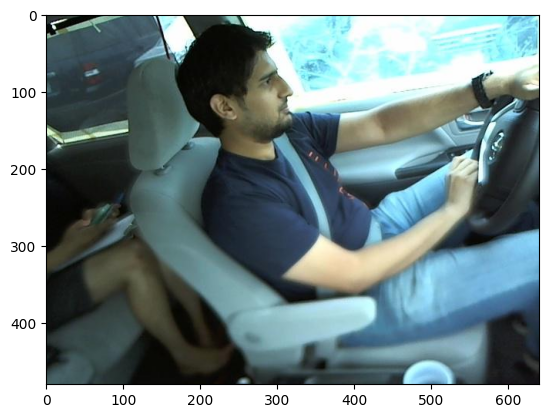

/content/dataset/image/train/c1
/content/dataset/image/train/c1/img_1830.jpg


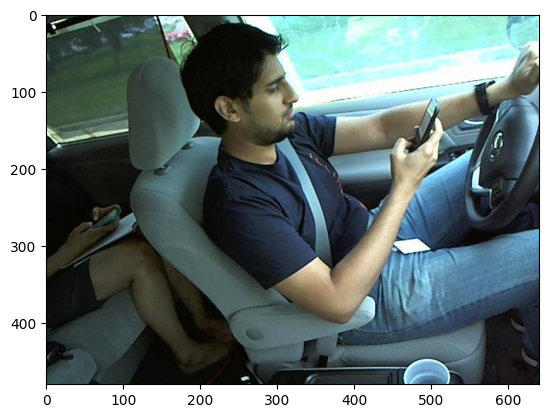

/content/dataset/image/train/c2
/content/dataset/image/train/c2/img_59330.jpg


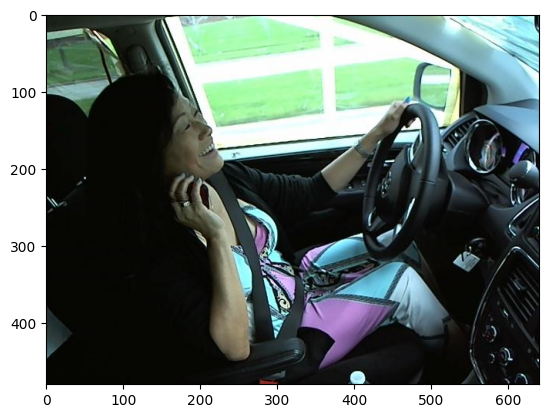

/content/dataset/image/train/c3
/content/dataset/image/train/c3/img_6265.jpg


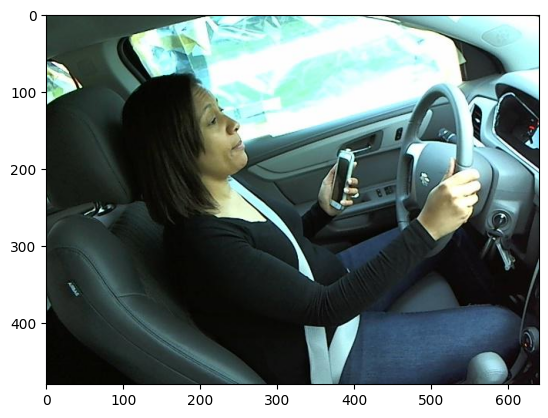

/content/dataset/image/train/c4
/content/dataset/image/train/c4/img_42776.jpg


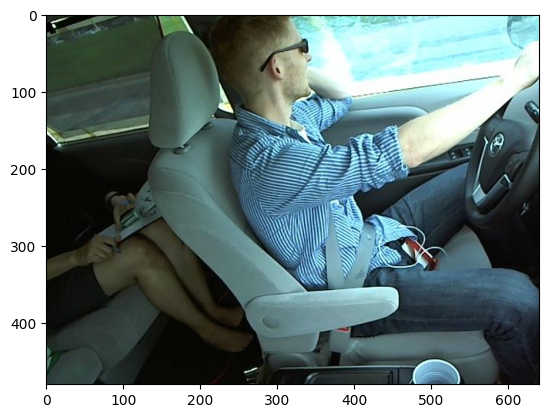

/content/dataset/image/train/c5
/content/dataset/image/train/c5/img_10847.jpg


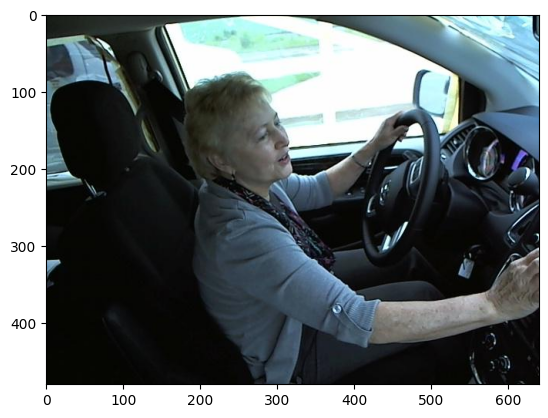

/content/dataset/image/train/c6
/content/dataset/image/train/c6/img_88564.jpg


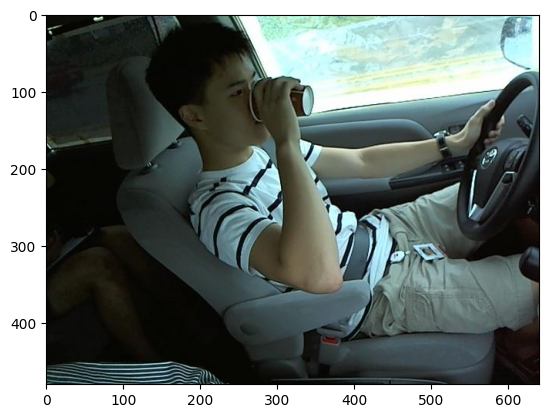

/content/dataset/image/train/c7
/content/dataset/image/train/c7/img_19095.jpg


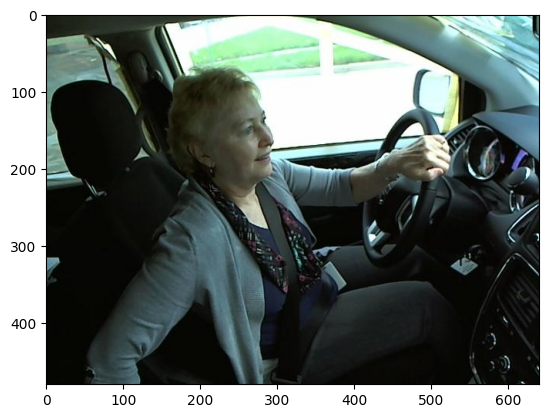

/content/dataset/image/train/c8
/content/dataset/image/train/c8/img_20354.jpg


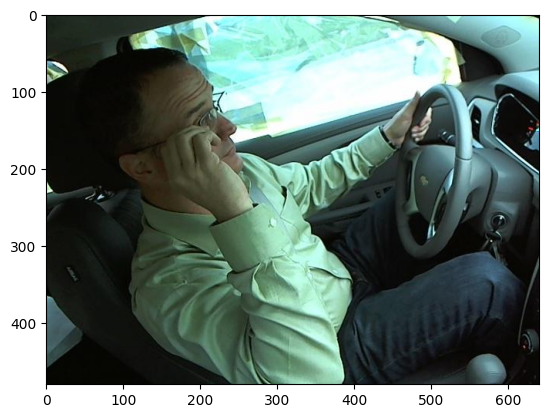

/content/dataset/image/train/c9
/content/dataset/image/train/c9/img_56371.jpg


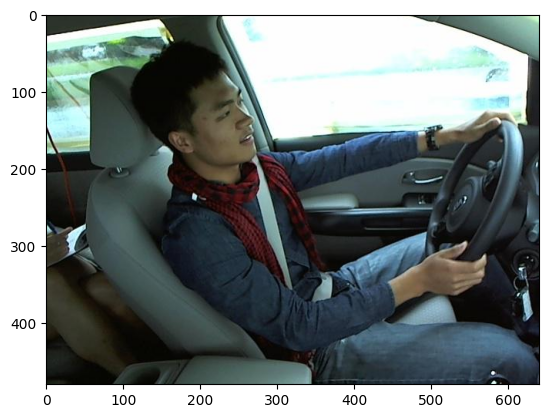

In [ ]:
for i in classes:
    path = os.path.join(directory,i)
    random_filename = random.choice([
          x for x in os.listdir(path)
          if os.path.isfile(os.path.join(path,x))])
    random_path=path+'/'+random_filename
    print(path)
    print(random_path)
    img_array = cv2.imread(random_path,cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img)
    plt.show()

/content/dataset/image/test/img_52094.jpg


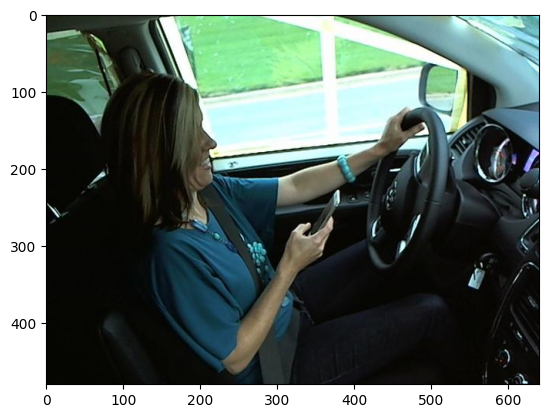

In [ ]:
# Test class image for display.
random_filename = random.choice([
          x for x in os.listdir(test_directory)
          if os.path.isfile(os.path.join(test_directory,x))])
random_path=test_directory+'/'+random_filename
print(random_path)
img_array = cv2.imread(random_path,cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [ ]:
# checkking image size using shape.
print(img_array.shape)

(480, 640, 3)


(240, 240, 3)


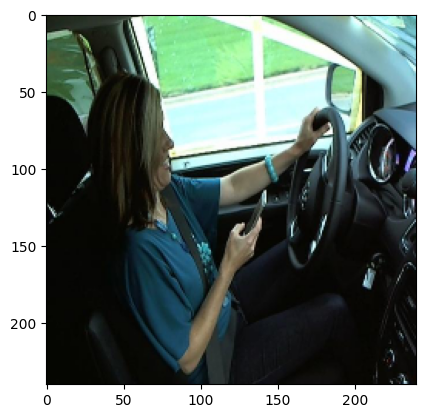

In [ ]:
# trying out the resize image functionality
new_img = cv2.resize(RGB_img,(img_size,img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()


In [ ]:
# creating a training dataset.
training_data = []
i = 0
for category in classes:    
    path = os.path.join(directory,category)
    class_num = classes.index(category)
      
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_img = cv2.resize(RGB_img,(img_size,img_size))
        training_data.append([new_img,class_num])

In [ ]:
del img_array,RGB_img,new_img

In [ ]:
print(len(training_data))

22424


In [ ]:
random.shuffle(training_data)

In [ ]:
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

In [ ]:
len(x),len(y)

In [ ]:
x[0].shape

In [ ]:
len(x)

In [ ]:
x = np.array(x).reshape(-1,img_size,img_size,3)
x[0].shape

(240, 240, 3)

In [ ]:
np.save('x.npy', x)
np.save('y.npy', y)

In [ ]:
# load the value incase of the crash of ram
x = np.load('x.npy')
y = np.load('y.npy')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=96)

In [ ]:
del x,y

In [ ]:
np.save('x_train.npy', x_train)
np.save('x_test.npy', x_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [ ]:
import gc
gc.collect()

0

In [ ]:
Y_train = utils.to_categorical(y_train,num_classes=10)
Y_test = utils.to_categorical(y_test,num_classes=10)

In [ ]:
np.save('Y_train.npy', Y_train)
np.save('Y_test.npy', Y_test)

In [ ]:
del y_train,y_test

In [ ]:
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
Y_train = np.load('Y_train.npy') 
Y_test = np.load('Y_test.npy')

In [ ]:
model = models.Sequential()
## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 238, 238, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 238, 238, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 238, 238, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                        

In [ ]:
model.save('/content/'+'/best_model.h5')

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model(/content/'+'/best_model.h5')

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callback = [callbacks.EarlyStopping(monitor='val_accuracy',patience=5)]
batch_size = 70
n_epochs = 15
steps = len(x_train) // batch_size

In [ ]:
results = model.fit(x_train,Y_train,
                    batch_size=batch_size,epochs=n_epochs,
                    verbose=1,
                    validation_data=(x_test,Y_test),
                    callbacks=callback)

Epoch 1/15
225/225 [==============================] - 196s 766ms/step - loss: 0.7316 - accuracy: 0.7717 - val_loss: 0.2108 - val_accuracy: 0.9416
Epoch 2/15
225/225 [==============================] - 157s 699ms/step - loss: 0.1428 - accuracy: 0.9570 - val_loss: 0.1138 - val_accuracy: 0.9630
Epoch 3/15
225/225 [==============================] - 157s 698ms/step - loss: 0.0692 - accuracy: 0.9792 - val_loss: 0.1023 - val_accuracy: 0.9646
Epoch 4/15
225/225 [==============================] - 157s 698ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.0623 - val_accuracy: 0.9841
Epoch 5/15
225/225 [==============================] - 157s 697ms/step - loss: 0.0416 - accuracy: 0.9878 - val_loss: 0.0402 - val_accuracy: 0.9889
Epoch 6/15
225/225 [==============================] - 188s 836ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 7/15
225/225 [==============================] - 229s 1s/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0407 - va

In [ ]:
# for i in range(n_epochs):
#     # fit for one epoch
#     pickled_model.fit(x_train,Y_train,batch_size=batch_size, epochs=1, steps_per_epoch=steps, verbose=1)

224/224 [==============================] - 166s 633ms/step - loss: 0.7398 - accuracy: 0.7664


In [ ]:
del x_train,Y_train,Y_test

In [ ]:
model.save('/content/'+'/fit_model.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/'+'/fit_model.h5')

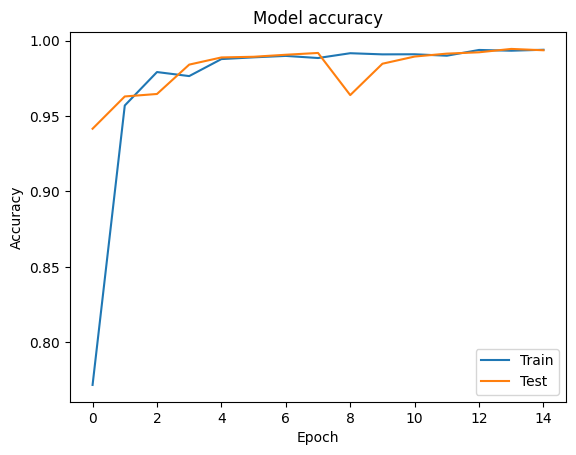

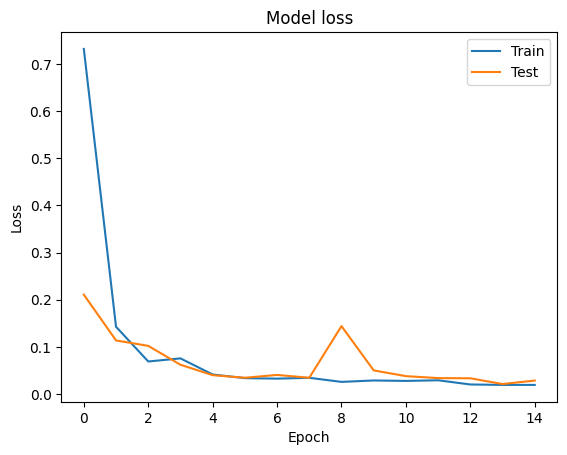

In [ ]:
# Plot training & validation accuracy values
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Predict

In [ ]:
x_test = np.load('x_test.npy') 

In [ ]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

211/211 [==============================] - 12s 47ms/step


## Confusion Matrix

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y_test = np.load('y_test.npy')

In [ ]:
predict_X = []
for p in predict_x:
    predict_X.append(int(p.argmax()))
predict_X = np.array(predict_X)

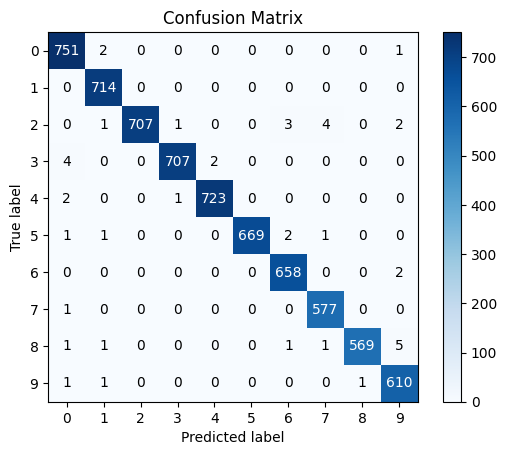

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predict_X)
plt.show()

## Classification Report

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, predict_X))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       754
           1       0.99      1.00      1.00       714
           2       1.00      0.98      0.99       718
           3       1.00      0.99      0.99       713
           4       1.00      1.00      1.00       726
           5       1.00      0.99      1.00       674
           6       0.99      1.00      0.99       660
           7       0.99      1.00      0.99       578
           8       1.00      0.98      0.99       578
           9       0.98      1.00      0.99       613

    accuracy                           0.99      6728
   macro avg       0.99      0.99      0.99      6728
weighted avg       0.99      0.99      0.99      6728



## Classes Definitions
    c0: safe driving
    c1: texting - right
    c2: talking on the phone - right
    c3: texting - left
    c4: talking on the phone - left
    c5: operating the radio
    c6: drinking
    c7: reaching behind
    c8: hair and makeup
    c9: talking to passenger

## Testing using random image

In [ ]:
from tqdm import tqdm #as tqdm

In [ ]:
# Test class image for display.
output = {}
for img in tqdm(os.listdir(test_directory)):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    new_img = cv2.resize(RGB_img,(img_size,img_size))
    pred = model.predict(new_img.reshape(-1,img_size,img_size,3),verbose=0)
    file_name = img.split('.')[0]
    output[file_name] =  pred[0].tolist()

100%|██████████| 25000/25000 [45:47<00:00,  9.10it/s]


In [ ]:
output_data = pd.DataFrame.from_dict(output,orient='index', dtype=None)

In [ ]:
output_data.head(5)

In [ ]:
output_data.shape

In [ ]:
output_data.to_csv('output2.csv')